#  <center>图像操作</center>

## 1.改变图像颜色空间

### 1.1openCV.threshold函数
`cv2.threshold (src, thresh, maxval, type)`

Args:
- `src`:原图片，必须是单通道
- `thresh`:阈值，取值范围0~255
- `maxval`:填充色，取值范围0~255
- `type`:阈值类型

type:
| 阈值 | 小于阈值像素点 | 大于阈值的像素点 | 对应变量              |
| ---- | -------------- | ---------------- | --------------------- |
| 0    | 置0            | 置填充色         | cv2.THRESH_BINARY     |
| 1    | 置填充色       | 置0              | cv2.THRESH_BINARY_INV |
| 2    | 保持原色       | 置灰色           | cv2.THRESH_TRUNC      |
| 3    | 置0            | 保持原色         | cv2.THRESH_TOZERO     |
| 4    | 保持原色       | 置0              | cv2.THRESH_TOZERO_INV |




### 1.2openCV.bitwise_and/not/or/xor()函数

- `cv2.bitwise_not(src)`:将图片里的像素值按位取反 倒置图像中的“开”和“关”像素。
- `cv2.bitwise_and(目标文件，源文件，mask)`:将图片里的像素值按位与 当且仅当两个像素都大于零时，按位AND才为真，相与取较大值为结果
- `cv2.bitwise_xor(目标文件，源文件，mask)`:将图片里的像素值按位异或 当且仅当两个像素转化为二进制进行异或计算
- `cv2.bitwise_or(目标文件，源文件，mask)`:如果两个像素中的任何一个大于零，则按位“或”为真，相或取较小值为结果

(-0.5, 722.5, 719.5, -0.5)

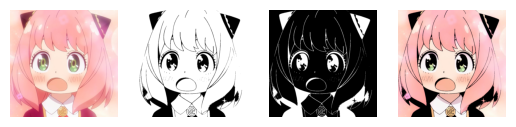

In [1]:
import cv2 as cv
import torch 
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 4)

img = cv.imread('../Aniya1.jpg', 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# rows,cols,channels = img.shape

gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
ret, mask = cv.threshold(gray_img, 180, 255, cv.THRESH_BINARY)# 图像二值化
mask_inv = cv.bitwise_not(mask)# 图像像素点取反
img1 = cv.bitwise_and(img, img, mask = mask)
# img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)


axs[0].imshow(img, cmap = 'gray')
axs[0].axis('off')
axs[1].imshow(mask, cmap='gray')
axs[1].axis('off')
axs[2].imshow(mask_inv, cmap='gray')
axs[2].axis('off')
axs[3].imshow(img1)
axs[3].axis('off')


# plt.imshow(img, cmap='gray')

In [57]:
import cv2 as cv
import torch
import matplotlib.pyplot as plt

img = cv.imread('3.png', 1)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
print(hsv.shape)

lower_blue = torch.tensor([100, 200, 100]).numpy()
upper_blue = torch.tensor([200, 255, 255]).numpy()
mask = cv.inRange(hsv, lower_blue, upper_blue)# 从HSV图像当中分离某一色段的像素点
res = cv.bitwise_and(img, img, mask=mask)

cv.imshow('mask', mask)
cv.imshow('img', img)
cv.imshow('hsv', hsv)
cv.imshow('res', res)


cv.waitKey(0)
cv.destroyAllWindows()



(220, 220, 3)


### 1.3 cv2,inRange(hsv, lower_color, upper_color)函数
- `hsv`:hsv格式的原图
- `lower_color`:是指图像低于这个lower_color的值，图像值变为0，即黑色
- `upper_lower`:是指的是图像中高于这个upper_red的值，图像值变为0

而在`lower_color~upper_lower`之间的值变成255

In [56]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(1)
lower_blue = np.array([100, 155, 50])
upper_blue = np.array([130, 255, 255])

if not cap.isOpened():
    print('camera open failed')
    exit()

while True:
    ret, img = cap.read()

    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    mask = cv.inRange(hsv, lower_blue, upper_blue)
    res = cv.bitwise_and(img, img, mask=mask)
    cv.imshow('res', res)

    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()




###  1.3确定某一颜色的HSV的值

In [1]:
import cv2 as cv
import numpy as np

green = np.uint8([[[0, 255, 0]]]) 
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]
